## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

作業1：試著調整 Decision Tree 中的參數，並觀察是否會改變結果？   
作業2：改用其他資料集 (diabetes, wine)，並與迴歸模型的結果進行比較

---
### 1.

In [42]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import precision_score, recall_score, accuracy_score

iris = datasets.load_iris()

In [19]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [26]:
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [53]:
ctree = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
)

ctree.fit(x_train, y_train)
y_pred = ctree.predict(x_test)

In [54]:
acc = metrics.accuracy_score(y_test, y_pred)

acc

0.9333333333333333

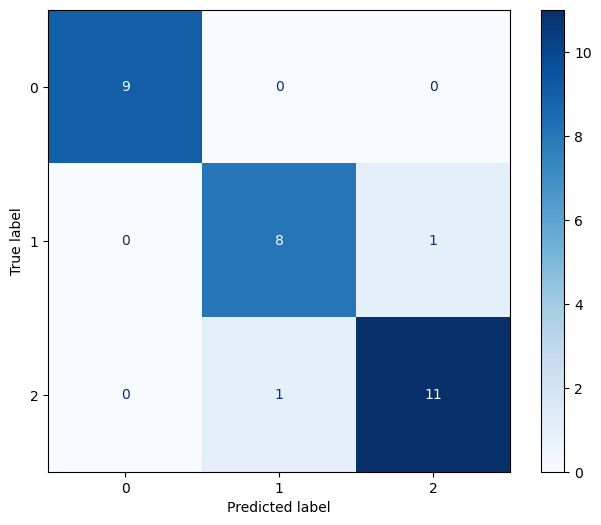

Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333


In [55]:
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
#                               display_labels=label
                             )
disp.plot(ax=ax, cmap='Blues')

plt.show(fig)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X = iris.data
y = iris.target

X.shape

(150, 4)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

y_test

(120, 4)
(30, 4)
(120,)
(30,)


array([1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2,
       2, 1, 2, 2, 0, 2, 1, 2])

In [6]:
treec = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 2,
)

treec.fit(x_train, y_train)

y_pred = treec.predict(x_test)

print(y_pred)
print(y_test)

[1 2 0 0 1 0 1 2 2 1 0 1 1 2 2 1 0 0 2 0 0 2 1 1 2 2 0 2 1 2]
[1 2 0 0 1 0 1 2 2 1 0 1 1 2 2 1 0 0 2 0 0 2 2 1 2 2 0 2 1 2]


In [7]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9666666666666667


In [8]:
from graphviz import Digraph

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
print("Feature importance: ", treec.feature_importances_)

---
### 2.

In [9]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split


dia = datasets.load_diabetes()

In [10]:
dia.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [11]:
df = pd.DataFrame(dia.data, columns=dia.feature_names)

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [12]:
X = dia.data
y = dia.target

treec = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [14]:
treec.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = treec.predict(x_test)

print(y_pred)
print(y_test)

[121. 129.  59. 273.  74.  63. 237. 242.  83. 248.  44. 178.  72. 241.
 292.  75. 217. 111.  66. 292. 127. 257. 144. 249. 221.  92. 332. 124.
  53. 129.  88. 185.  70.  55.  53.  61. 182. 202.  65. 121. 296.  95.
 127.  85. 183. 296. 135. 246. 109.  31. 220.  71. 200.  83.  90.  37.
 144.  84.  95. 243. 147. 196. 274.  90.  94. 243. 293. 167. 232. 142.
 216. 111.  77.  93. 248. 295. 263.  96.  94. 172. 118.  77. 177. 113.
 153. 295.  42. 220. 206.]
[ 70. 107.  72. 248. 178. 118. 197. 310.  53. 233.  47. 214.  48. 152.
 120.  52. 258. 346. 155. 190.  68. 341.  64. 229.  99.  84. 264. 244.
 160. 288.  54. 142. 137. 145. 201. 182.  88. 265.  78. 131. 186.  78.
 190. 202.  91. 128.  65. 265.  48.  63. 101.  96. 181. 101.  97.  65.
  68. 279. 141. 195. 259. 197. 336. 179. 108. 252.  85. 179. 139. 214.
 104.  81. 281. 141. 137. 277. 275. 168.  87. 275. 132.  64.  91. 141.
  53. 275.  72. 209.  66.]


In [17]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.0
